In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
df=pd.read_csv('Property_Price_train.csv')
df.head()

,Id,Building_Class,Zoning_Class,Lot_Extent,Lot_Size,Road_Type,Lane_Type,Property_Shape,Land_Outline,Utility_Type,Lot_Configuration,Property_Slope,Neighborhood,Condition1,Condition2,House_Type,House_Design,Overall_Material,House_Condition,Construction_Year,Remodel_Year,Roof_Design,Roof_Quality,Exterior1st,Exterior2nd,Brick_Veneer_Type,Brick_Veneer_Area,Exterior_Material,Exterior_Condition,Foundation_Type,Basement_Height,Basement_Condition,Exposure_Level,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,Total_Basement_Area,Heating_Type,Heating_Quality,Air_Conditioning,Electrical_System,First_Floor_Area,Second_Floor_Area,LowQualFinSF,Grade_Living_Area,Underground_Full_Bathroom,Underground_Half_Bathroom,Full_Bathroom_Above_Grade,Half_Bathroom_Above_Grade,Bedroom_Above_Grade,Kitchen_Above_Grade,Kitchen_Quality,Rooms_Above_Grade,Functional_Rate,Fireplaces,Fireplace_Quality,Garage,Garage_Built_Year,Garage_Finish_Year,Garage_Size,Garage_Area,Garage_Quality,Garage_Condition,Pavedd_Drive,W_Deck_Area,Open_Lobby_Area,Enclosed_Lobby_Area,Three_Season_Lobby_Area,Screen_Lobby_Area,Pool_Area,Pool_Quality,Fence_Quality,Miscellaneous_Feature,Miscellaneous_Value,Month_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price
0,1,60,RLD,65.0,8450,Paved,NaN,Reg,Lvl,AllPub,I,GS,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,SS,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PC,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,TF,0,NaN,Attchd,2003.0,RFn,2,1085.793744,TA,TA,Y,163.788080,69.596115,20.337934,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RLD,80.0,9600,Paved,NaN,Reg,Lvl,AllPub,FR2P,GS,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,SS,MetalSd,MetalSd,NaN,0.0,TA,TA,CB,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,TF,1,TA,Attchd,1976.0,RFn,2,196.316304,TA,TA,Y,198.900074,74.716033,15.039392,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RLD,68.0,11250,Paved,NaN,IR1,Lvl,AllPub,I,GS,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,SS,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PC,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,TF,1,TA,Attchd,2001.0,RFn,2,218.068403,TA,TA,Y,26.127533,32.085268,-46.232198,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RLD,60.0,9550,Paved,NaN,IR1,Lvl,AllPub,C,GS,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,SS,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BT,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,TF,1,Gd,Detchd,1998.0,Unf,3,696.996439,TA,TA,Y,46.948018,40.181415,60.921821,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RLD,84.0,14260,Paved,NaN,IR1,Lvl,AllPub,FR2P,GS,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,SS,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PC,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,TF,1,TA,Attchd,2000.0,RFn,3,568.859882,TA,TA,Y,-10.626105,20.755323,21.788818,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df.shape

(1459, 81)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Id                         1459 non-null   int64  
 1   Building_Class             1459 non-null   int64  
 2   Zoning_Class               1459 non-null   object 
 3   Lot_Extent                 1200 non-null   float64
 4   Lot_Size                   1459 non-null   int64  
 5   Road_Type                  1459 non-null   object 
 6   Lane_Type                  91 non-null     object 
 7   Property_Shape             1459 non-null   object 
 8   Land_Outline               1459 non-null   object 
 9   Utility_Type               1459 non-null   object 
 10  Lot_Configuration          1459 non-null   object 
 11  Property_Slope             1459 non-null   object 
 12  Neighborhood               1459 non-null   object 
 13  Condition1                 1459 non-null   objec

In [5]:
df.isnull().sum()

Id                              0
Building_Class                  0
Zoning_Class                    0
Lot_Extent                    259
Lot_Size                        0
Road_Type                       0
Lane_Type                    1368
Property_Shape                  0
Land_Outline                    0
Utility_Type                    0
Lot_Configuration               0
Property_Slope                  0
Neighborhood                    0
Condition1                      0
Condition2                      0
House_Type                      0
House_Design                    0
Overall_Material                0
House_Condition                 0
Construction_Year               0
Remodel_Year                    0
Roof_Design                     0
Roof_Quality                    0
Exterior1st                     0
Exterior2nd                     0
Brick_Veneer_Type             871
Brick_Veneer_Area               8
Exterior_Material               0
Exterior_Condition              0
Foundation_Typ

In [6]:
df.isnull().sum()[df.isnull().sum()> 0]

Lot_Extent                259
Lane_Type                1368
Brick_Veneer_Type         871
Brick_Veneer_Area           8
Basement_Height            37
Basement_Condition         37
Exposure_Level             38
BsmtFinType1               37
BsmtFinType2               38
Electrical_System           1
Fireplace_Quality         689
Garage                     81
Garage_Built_Year          81
Garage_Finish_Year         81
Garage_Quality             81
Garage_Condition           81
Pool_Quality             1452
Fence_Quality            1178
Miscellaneous_Feature    1405
dtype: int64

In [7]:
#if here are more than 40 or 50 percent null values drop the column

In [8]:
len(df.isnull().sum()[df.isnull().sum()> 0])

19

In [9]:
df.isnull().sum()[df.isnull().sum()*100/df.shape[0] > 50] 
#percentage of null value i.e. 50%

Lane_Type                1368
Brick_Veneer_Type         871
Pool_Quality             1452
Fence_Quality            1178
Miscellaneous_Feature    1405
dtype: int64

In [10]:
df.Lot_Extent = df.Lot_Extent.fillna(df.Lot_Extent.mean())

In [11]:
df.Brick_Veneer_Area = df.Brick_Veneer_Area.fillna(df.Brick_Veneer_Area.mean())

In [12]:
df.Garage_Built_Year = df.Garage_Built_Year.fillna(df.Garage_Built_Year.mean())

# Drop Columns

In [13]:
df = df.drop(['Lane_Type','Pool_Quality','Fence_Quality','Miscellaneous_Feature'], axis = 1)

In [14]:
df.shape

(1459, 77)

In [15]:
df.describe()

,Id,Building_Class,Lot_Extent,Lot_Size,Overall_Material,House_Condition,Construction_Year,Remodel_Year,Brick_Veneer_Area,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,Total_Basement_Area,First_Floor_Area,Second_Floor_Area,LowQualFinSF,Grade_Living_Area,Underground_Full_Bathroom,Underground_Half_Bathroom,Full_Bathroom_Above_Grade,Half_Bathroom_Above_Grade,Bedroom_Above_Grade,Kitchen_Above_Grade,Rooms_Above_Grade,Fireplaces,Garage_Built_Year,Garage_Size,Garage_Area,W_Deck_Area,Open_Lobby_Area,Enclosed_Lobby_Area,Three_Season_Lobby_Area,Screen_Lobby_Area,Pool_Area,Miscellaneous_Value,Month_Sold,Year_Sold,Sale_Price
count,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.00000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,730.000000,56.922550,70.045833,10517.225497,6.100069,5.575051,1971.272104,1984.879369,103.75672,443.374914,46.382454,567.535984,1057.293352,1162.562714,347.230295,5.848526,1515.641535,0.424949,0.057574,1.565456,0.382454,2.866347,1.046607,6.518163,0.613434,1978.515965,1.767649,470.934787,93.015667,47.811902,24.580227,3.411926,15.071282,2.760795,43.518849,6.322138,2007.815627,180944.102810
std,421.321334,42.304033,22.031192,9984.675721,1.383171,1.113125,30.212814,20.645927,180.61060,456.142186,161.248500,441.874057,438.824912,386.712553,436.583480,48.639512,525.616607,0.518870,0.238830,0.550906,0.502798,0.816050,0.220410,1.625894,0.644687,24.000202,0.747301,210.668787,124.796682,67.467586,61.353507,29.327247,55.775138,40.191018,496.291826,2.704540,1.328542,79464.918335
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.00000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,-129.369350,-338.112031,-187.149958,-164.807386,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.500000,20.000000,60.000000,7549.000000,5.000000,5.000000,1954.000000,1967.000000,0.00000,0.000000,0.000000,223.500000,795.500000,882.000000,0.000000,0.000000,1129.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1962.000000,1.000000,329.290489,9.656026,1.843186,-16.807302,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129950.000000
50%,730.000000,50.000000,70.045833,9477.000000,6.000000,5.000000,1973.000000,1994.000000,0.00000,383.000000,0.000000,479.000000,991.000000,1086.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1978.515965,2.000000,471.028116,92.803628,46.837919,25.026953,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1094.500000,70.000000,79.000000,11603.000000,7.000000,6.000000,2000.000000,2004.000000,164.50000,712.000000,0.000000,808.000000,1298.500000,1391.500000,728.000000,0.000000,1777.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2001.000000,2.000000,607.184977,180.335986,96.523486,66.237591,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1459.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.00000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1147.488093,572.298709,255.362547,225.762714,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# Convert Object to int  by using Label Encoder

In [16]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [17]:
df[df.select_dtypes(include=['object']).columns] = df[df.select_dtypes(include=['object']).columns].apply(le.fit_transform)

# Sampling

#Dividing data into tain and test data in 80/20 percent.
#Data is divide to reduce the biasness while testing.

In [18]:
from sklearn.model_selection import train_test_split

In [146]:
df = df1

In [147]:
df_train, df_test = train_test_split(df, test_size= .2)

In [148]:
#for testing about 80% data
df_train.shape

(1008, 77)

In [149]:
#for testing remaining 20%
df_test.shape

(253, 77)

In [150]:
df_train_y = df_train.iloc[:, -1]
df_test_y = df_test.iloc[:, -1]

In [151]:
df_train_x = df_train.iloc[:, :-1]
df_test_x = df_test.iloc[:, :-1]

In [152]:
df_test_y.head()

266     185000
216     210000
603     151000
1276    162000
129     150000
Name: Sale_Price, dtype: int64

In [153]:
df_train_x.head()

,Id,Building_Class,Zoning_Class,Lot_Extent,Lot_Size,Road_Type,Property_Shape,Land_Outline,Utility_Type,Lot_Configuration,Property_Slope,Neighborhood,Condition1,Condition2,House_Type,House_Design,Overall_Material,House_Condition,Construction_Year,Remodel_Year,Roof_Design,Roof_Quality,Exterior1st,Exterior2nd,Brick_Veneer_Type,Brick_Veneer_Area,Exterior_Material,Exterior_Condition,Foundation_Type,Basement_Height,Basement_Condition,Exposure_Level,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,Total_Basement_Area,Heating_Type,Heating_Quality,Air_Conditioning,Electrical_System,First_Floor_Area,Second_Floor_Area,LowQualFinSF,Grade_Living_Area,Underground_Full_Bathroom,Underground_Half_Bathroom,Full_Bathroom_Above_Grade,Half_Bathroom_Above_Grade,Bedroom_Above_Grade,Kitchen_Above_Grade,Kitchen_Quality,Rooms_Above_Grade,Functional_Rate,Fireplaces,Fireplace_Quality,Garage,Garage_Built_Year,Garage_Finish_Year,Garage_Size,Garage_Area,Garage_Quality,Garage_Condition,Pavedd_Drive,W_Deck_Area,Open_Lobby_Area,Enclosed_Lobby_Area,Three_Season_Lobby_Area,Screen_Lobby_Area,Pool_Area,Miscellaneous_Value,Month_Sold,Year_Sold,Sale_Type,Sale_Condition
419,420,20,3,65.000000,8450,1,3,3,0,4,0,12,2,2,0,2,5,6,1968,1968,1,4,12,13,3,0.0,3,4,1,3,3,3,1,775,5,0,281,1056,1,0,1,4,1056,0,0,1056,1,0,1,0,3,1,3,6,7,1,1,2,1968.0,2,1,600.531484,4,4,2,110.311367,99.985162,1.770741,0,0,0,0,7,2010,8,4
713,714,190,3,60.000000,9873,1,3,3,0,4,0,3,6,2,1,2,4,5,1970,1970,1,4,6,6,1,160.0,3,4,1,3,3,0,0,789,5,0,171,960,2,4,0,4,960,0,0,960,1,0,1,0,3,1,3,6,7,0,5,6,1970.0,2,2,687.158633,4,4,2,373.828673,-63.881995,73.457985,0,0,0,0,5,2006,8,4
267,268,75,3,60.000000,8400,1,3,0,0,4,1,18,2,2,0,3,5,8,1939,1997,1,4,13,14,3,0.0,3,4,2,3,3,3,3,378,5,0,342,720,1,0,1,4,1052,720,420,2192,0,0,2,1,4,1,2,8,7,1,2,6,1939.0,2,1,159.939613,4,4,2,227.415901,-7.327971,74.928303,0,0,0,0,7,2008,8,4
339,340,20,3,66.000000,12400,1,0,3,0,4,0,12,1,2,0,2,6,7,1958,1998,3,4,13,14,1,176.0,3,4,1,3,0,3,4,585,5,0,630,1215,1,4,1,0,1215,0,0,1215,0,0,1,0,3,1,3,6,7,0,5,2,1958.0,2,1,413.557437,4,4,2,-95.561005,-6.774559,196.022940,0,234,0,0,6,2009,8,4
1045,1046,20,3,70.045833,13680,1,0,3,0,1,0,7,2,2,0,2,3,5,1955,1955,3,4,3,14,3,0.0,3,4,4,4,4,4,6,0,6,0,0,0,1,0,1,0,1733,0,0,1733,0,0,2,0,4,1,3,8,2,1,2,2,1955.0,2,2,422.491283,4,4,2,245.484647,-34.521582,-2.153009,0,0,0,0,6,2009,8,4


# Building Model

#import neccessary function sklearn
#create an object of that function
#run the fit function and model is created
#run the prediction

In [154]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
#Building model on train data :)
lr.fit(df_train_x, df_train_y)

LinearRegression()

In [155]:
Rsqr = lr.score(df_train_x,df_train_y)
Rsqr
#Its range is 0-1 and higher the Rsqr better the model

0.8784145644734398

In [156]:
N = df_train_x.shape[0]
K = df_train_x.shape[1]

In [157]:
adj_Rsqr = 1-(1-Rsqr)*(N-1)/(N-K-1)
adj_Rsqr
# adj_Rsqr < Rsqr

0.8684892227978023

In [158]:
lr.coef_

array([-1.16242109e+00, -1.49962610e+01, -5.41643583e+03,  2.45987551e+01,
        4.53021074e-01,  2.63042982e+04, -5.47415531e+02,  1.75901659e+02,
       -2.00603373e+04, -4.90344722e+02,  4.75192011e+02, -1.53827097e+02,
        1.71283142e+02, -1.19220758e+03, -2.11349905e+03,  1.35146378e+02,
        8.04128133e+03,  5.18142661e+03,  2.99567227e+02,  7.56633212e+01,
        2.78870130e+02, -5.21063280e+03, -5.59047803e+02,  3.73144457e+02,
        2.00628612e+03,  6.38675578e+00, -4.33076976e+03,  9.67656447e+02,
        1.48188859e+03, -4.96002906e+02,  1.64252853e+03, -6.61456965e+02,
       -3.68111120e+01,  9.90458296e+00,  1.26469804e+02,  6.00887553e+00,
       -3.27854207e-01,  1.55856043e+01, -1.49318444e+03, -8.73511508e+02,
       -3.52401547e+03, -7.29711029e+02,  2.33783790e+01,  1.97649731e+01,
       -2.02112150e+01,  2.29321372e+01,  4.42311474e+03,  5.73311789e+02,
        3.94036516e+03,  4.75403544e+02, -2.18620240e+03, -1.33398602e+04,
       -2.77578589e+03,  

In [159]:
df_train_x.columns
#coef for each clolumn, coef=beta

Index(['Id', 'Building_Class', 'Zoning_Class', 'Lot_Extent', 'Lot_Size',
       'Road_Type', 'Property_Shape', 'Land_Outline', 'Utility_Type',
       'Lot_Configuration', 'Property_Slope', 'Neighborhood', 'Condition1',
       'Condition2', 'House_Type', 'House_Design', 'Overall_Material',
       'House_Condition', 'Construction_Year', 'Remodel_Year', 'Roof_Design',
       'Roof_Quality', 'Exterior1st', 'Exterior2nd', 'Brick_Veneer_Type',
       'Brick_Veneer_Area', 'Exterior_Material', 'Exterior_Condition',
       'Foundation_Type', 'Basement_Height', 'Basement_Condition',
       'Exposure_Level', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'Total_Basement_Area', 'Heating_Type',
       'Heating_Quality', 'Air_Conditioning', 'Electrical_System',
       'First_Floor_Area', 'Second_Floor_Area', 'LowQualFinSF',
       'Grade_Living_Area', 'Underground_Full_Bathroom',
       'Underground_Half_Bathroom', 'Full_Bathroom_Above_Grade',
       'Half_Bathroom_A

In [160]:
lr.intercept_
#its beta-0

-170999.49628974564

In [161]:
lr.score(df_test_x, df_test_y)*100

24.809630973561415

In [162]:
pred_train = lr.predict(df_train_x)

In [163]:
pred_test = lr.predict(df_test_x)

In [164]:
pred_train

array([143122.57178906, 118718.93535049, 170427.99258181, ...,
       146803.08598593, 154421.74493484, 138129.10579605])

In [165]:
pred_test

array([187085.32051073, 206977.6707631 , 162644.76792007, 155513.4373292 ,
       137287.12573666, 113332.79200667, 177545.60178581, 152227.32769518,
       194844.76263111, 130568.81568404, 135010.59154459, 141857.14853727,
       132475.2313432 , 189242.02659888, 245481.82340715, 115175.35341849,
       154537.66851273, 185405.84500177, 174805.246414  , 155625.87479585,
       209553.27071108, 177768.11248508, 222780.828996  , 215862.48419789,
       206156.68261417, 172127.62550829, 153299.65119195, 124988.44729708,
       199506.4983762 , 178972.53042398, 149925.60871277,  97645.03506668,
       187238.6805107 , 210286.37061017, 111832.24455171, 141039.56397966,
       198145.61541591, 113394.03308317, 128058.05775643, 101295.72629358,
        90683.3639487 , 224637.26376479, 112218.2942519 , 163895.38034593,
       124810.17177011, 180116.35294019, 132549.02387574, 177717.62923996,
       148765.43644943, 123272.0215969 , 117412.39125722, 137495.4258086 ,
       162340.02313911, 1

In [166]:
err_test = df_test_y - pred_test

In [167]:
err_test

266      -2085.320511
216       3022.329237
603     -11644.767920
1276      6486.562671
129      12712.874263
358      16667.207993
50        -545.601786
862       -227.327695
1201      3055.237369
1397      6931.184316
92       28489.408455
206       2042.851463
1255     -4975.231343
1164      4757.973401
859       4518.176593
413       -175.353418
253       3462.331487
807      38094.154998
1171    -11805.246414
813       2274.125204
143      -5553.270711
1084      9731.887515
748      37619.171004
776       5637.515802
805      21523.317386
201       -627.625508
367      11700.348808
1452     20011.552703
1152     30493.501624
871      21527.469576
345      -9725.608713
1038      -645.035067
28       20261.319489
1155      7713.629390
441       6167.755448
504       5960.436020
933      -8145.615416
951       6505.966917
1370    -23058.057756
740      30704.273706
976      -5183.363949
737      15262.736235
553      -4218.294252
829     -16495.380346
957       7189.828230
364       

In [168]:
mse = np.mean(np.square(err_test))

In [169]:
mse
#lower the mse, better the model

1512849763.7725468

In [170]:
rmse = np.sqrt(mse)

In [171]:
rmse
#lower the rmse, better the model

38895.36943869472

In [172]:
mape = np.mean(np.abs(err_test*100)/(df_test_y))

In [173]:
mape
# #lower the mape, better the model i.e. 88.28% accuracy
#Mape focus on prediction accuracy and score focus overall performance

9.84855347881238

In [174]:
#Lets check the assumptions.
# Assumptions on train data.

In [175]:
err_train = df_train_y - pred_train
err_train

419    -1.122572e+03
713     1.028106e+04
267     9.072007e+03
339    -3.637336e+03
1045    4.969670e+03
525    -1.680738e+04
853    -9.422586e+03
514     7.992653e+03
920     1.240769e+04
263     1.416052e+04
269    -7.929178e+03
486     1.026395e+04
894     3.418790e+03
725     4.768986e+03
1368   -3.032162e+02
420     2.482862e+04
814    -1.110488e+03
353    -8.733582e+02
998     1.473447e+04
755     1.152712e+04
83      1.048715e+04
949     1.712299e+04
119    -1.945607e+04
1177   -1.350086e+04
1300    5.597653e+02
1454   -1.416442e+04
910    -9.407222e+03
1073   -4.481415e+02
12      7.984531e+03
1227   -4.677684e+02
297     8.954961e+02
1056   -1.245588e+04
1321    1.466683e+03
1111    9.529512e+03
414     1.865245e+03
992    -1.424487e+04
1193    1.894604e+03
509    -1.178778e+04
1225    3.474214e+03
876    -3.726189e+03
96     -2.390446e+03
78      1.185247e+03
436    -4.305143e+03
1066   -5.863557e+03
1371   -2.593965e+04
234     4.969523e+03
1259   -1.369030e+04
1398   -6.430

In [176]:
np.mean(err_train)

2.136590727974498e-10

In [177]:
#Erros should be normally distributed
import matplotlib.pyplot as plt

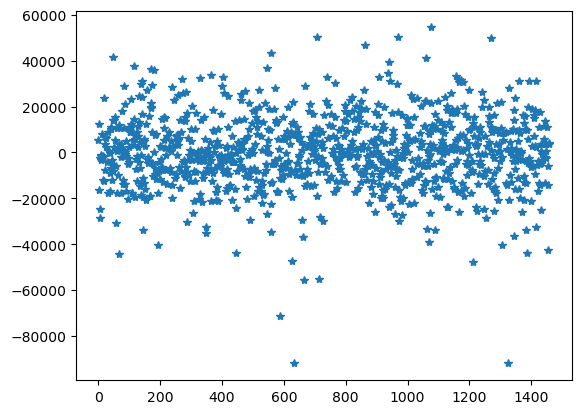

In [178]:
plt.plot(err_train, '*')

(array([  2.,   0.,   1.,   0.,   1.,   1.,   6.,  10.,  17.,  51., 118.,
        173., 229., 175., 110.,  63.,  31.,  12.,   4.,   4.]),
 array([-91924.61709049, -84604.74307913, -77284.86906777, -69964.99505641,
        -62645.12104505, -55325.24703369, -48005.37302233, -40685.49901097,
        -33365.62499961, -26045.75098825, -18725.87697689, -11406.00296553,
         -4086.12895417,   3233.74505719,  10553.61906855,  17873.49307991,
         25193.36709127,  32513.24110263,  39833.11511399,  47152.98912535,
         54472.86313671]),
 <BarContainer object of 20 artists>)

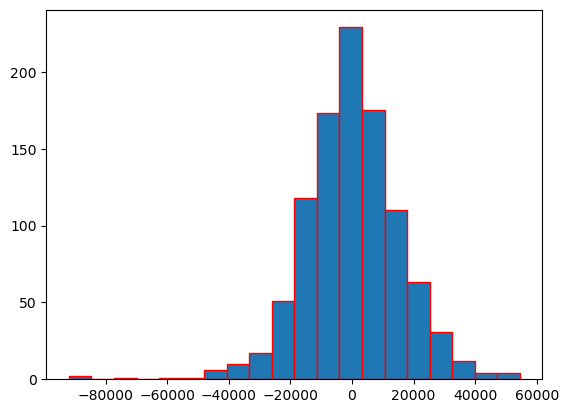

In [179]:
plt.hist(err_train, bins=20, edgecolor='r')

In [180]:
pred_actual_df = pd.DataFrame()

In [181]:
pred_actual_df['Actual'] = df_train_y
pred_actual_df['Predicted'] = pred_train

In [182]:
pred_actual_df

,Actual,Predicted
419,142000,143122.571789
713,129000,118718.935350
267,179500,170427.992582
339,155000,158637.335872
1045,139600,134630.330000
525,176000,192807.382053
853,158000,167422.585935
514,96500,88507.346836
920,201000,188592.314701
263,130000,115839.479428


In [183]:
import seaborn as sns

C:\Users\Ankush Sonawane\anaconda3\envs\py310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Ankush Sonawane\anaconda3\envs\py310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Ankush Sonawane\anaconda3\envs\py310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Ankush Sonawane\anaconda3\envs\py310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a futu

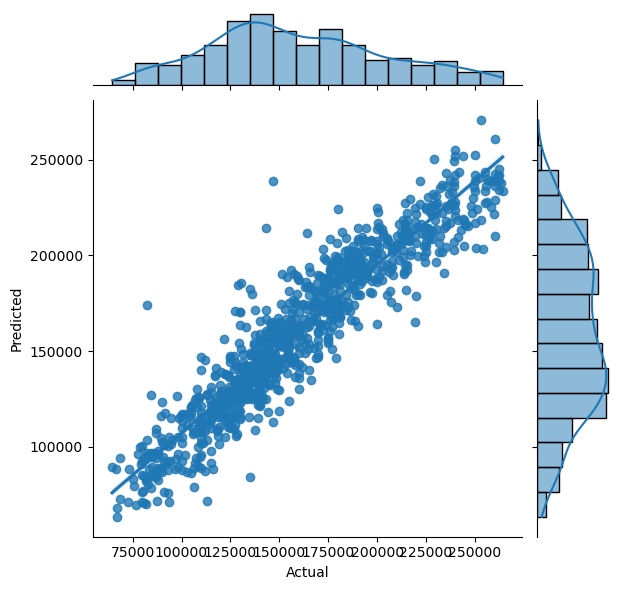

In [184]:
sns.jointplot(x='Actual', y='Predicted', data=pred_actual_df, kind='reg')

In [185]:
def remove_outliers(df, col, k):
    mean = df[col].mean()
    global df1
    sd = df[col].std()
    final_list = [x for x in df[col] if (x> mean - k*sd)]
    final_list = [x for x in final_list if (x< mean + k*sd)]
    df1 = df.loc[df[col].isin(final_list)]; print(df1.shape)
    print("No. of outliers=>  ", df.shape[0]-df1.shape[0])

In [186]:
remove_outliers(df, 'Sale_Price', 2)

(1211, 77)
No. of outliers=>   50
